In [10]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

In [11]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpy_image = sitk.GetArrayFromImage(itkimage)
    
    numpy_origin = np.array(list(reversed(itkimage.GetOrigin())))
    # size of pixels
    numpy_spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpy_image, numpy_origin, numpy_spacing

In [32]:
def readcsv(filename):
    lines = []
    with open(filename, "rt") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

In [33]:
# world coordinates = real-life, voxel = in arrays
def world_to_voxel(world_coord, origin, spacing):
    # think this is OK due to 2-D nature of images and origin is botLeft?
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

In [34]:
def normalize_planes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1.
    npzarray[npzarray < 0] = 0.
    return npzarray

In [80]:
# visualize patch and save it
def preprocess(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(numpy_image.shape)
    print(numpy_origin)
    print(numpy_spacing)
    
    #load candidates (points where nodules are centered)
    cands = readcsv(cand_path)
    for cand in cands[1:10]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 0
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
#         print(world_coord)
#         print(voxel_coord)
#         print(patch)
        
        output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))

(538, 512, 512)
[-298.774994 -143.100006 -180.600006]
[ 0.625       0.74218798  0.74218798]


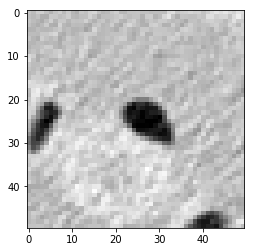

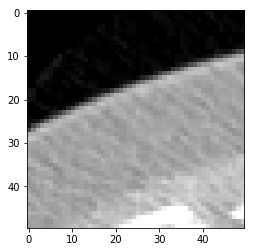

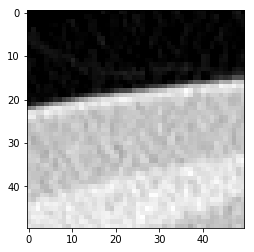

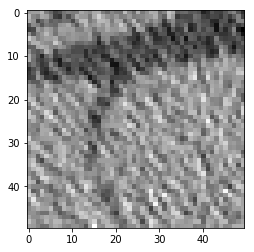

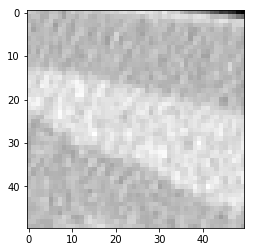

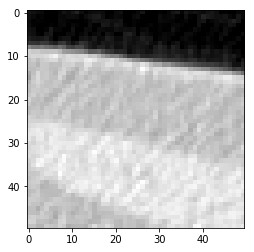

/Users/kanetian7/anaconda3/envs/Projects/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


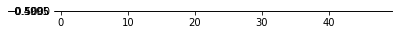

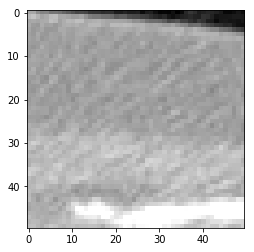

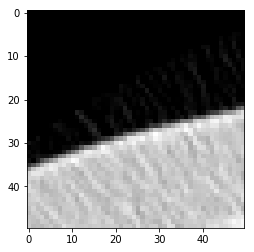

In [81]:
preprocess('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd', 
                '/Users/kanetian7/LUNA16/data/candidates_V2.csv')